# **ENCONTRAR MODELOS QUE CUMPLAN LOS SUPUESTOS**

(1) ARIMA(2,0,1)(0,0,1)[12], AIC=10403.718  
(2) ARIMA(2,0,1)(0,0,2)[12], AIC=10405.668  
(3) ARIMA(1,0,0)(0,0,1)[12], AIC=10412.960  
(4) ARIMA(0,0,1)(0,0,1)[12], AIC=10413.915  
(5) ARIMA(3,0,0)(0,0,1)[12], AIC=10414.034  
(6) ARIMA(1,0,1)(0,0,1)[12], AIC=10414.627  
(7) ARIMA(2,0,0)(0,0,1)[12], AIC=10414.675  
(8) ARIMA(1,0,0)(0,0,2)[12], AIC=10414.749  
(9) ARIMA(1,0,0)(1,0,1)[12], AIC=10414.783  
(10) ARIMA(0,0,2)(0,0,1)[12], AIC=10415.303  
(11) ARIMA(0,0,1)(0,0,2)[12], AIC=10415.701  
(12) ARIMA(0,0,1)(1,0,1)[12], AIC=10415.736  
(13) ARIMA(3,0,2)(0,0,1)[12], AIC=10428.176  
(14) ARIMA(0,0,0)(0,0,1)[12], AIC=10429.017  
(15) ARIMA(1,0,0)(1,0,0)[12], AIC=10497.035  
(16) ARIMA(0,0,1)(1,0,0)[12], AIC=10497.175  
(17) ARIMA(0,0,1)(0,0,0)[12], AIC=10626.494  
(18) ARIMA(1,0,0)(0,0,0)[12], AIC=10626.665  
(19) ARIMA(0,0,0)(0,0,0)[12], AIC=10629.724  

## **Cargar los datos**

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('MXN00021035.csv')

pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie

# Partir la serie para train y test
pre_total = pre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
pre = pre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
pre_test = pre_total[-12:]      # Test: últimos 12 meses

# Primera diferencia estacional con periodicidad 12
dpre = pre.diff(12).dropna() 

# **MODELADO**

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from modelo_admisible import * # Una funcion que hice para verificar si los parametros son estacionarios/invertibles

In [3]:
modelo=SARIMAX(dpre,
               order=(1,0,0),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  648
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -5105.029
Date:                              Thu, 24 Apr 2025   AIC                          10216.058
Time:                                      19:11:14   BIC                          10229.480
Sample:                                           0   HQIC                         10221.265
                                              - 648                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1664      0.031      5.429      0.000       0.106       0.227
ma.S.L12      -0.6853      0.024    -28.482      0.000      -0.732      -0.638
sigma2       4.03e+05    1.5e+04     26.782      0.000    3.73e+05    4.32e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               224.16
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.52
Prob(H) (two-sided):                  0.38   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [5]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.16644675982911483}

Raíces del polinomio característico: [6.00792711]

Módulo de las raíces: [6.00792711]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [6]:
invertible(modelo)

El polinomio de la parte media movil es: {'p12': -0.6853333330221818}

Raíces del polinomio característico: [-1.03198847e+00+0.j         -8.93728232e-01+0.51599424j
 -8.93728232e-01-0.51599424j -5.15994235e-01+0.89372823j
 -5.15994235e-01-0.89372823j -2.77555756e-17+1.03198847j
 -2.77555756e-17-1.03198847j  5.15994235e-01+0.89372823j
  5.15994235e-01-0.89372823j  1.03198847e+00+0.j
  8.93728232e-01+0.51599424j  8.93728232e-01-0.51599424j]

Módulo de las raíces: [1.03198847 1.03198847 1.03198847 1.03198847 1.03198847 1.03198847
 1.03198847 1.03198847 1.03198847 1.03198847 1.03198847 1.03198847]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


Ljung-Box (L1) (Q):	0.00  
Prob(Q):	0.95

Independientes

Jarque-Bera (JB):	9.68  
Prob(JB):	0.01

No son normales :(

Heteroskedasticity (H):	0.91  
Prob(H) (two-sided):	0.48

Varianza constante

In [7]:
residuos=modelo.resid

In [8]:
from scipy.stats import ttest_1samp

In [9]:
ttest_1samp(residuos, 0)    # Verificamos si los residuos son cero

TtestResult(statistic=-0.27087828152441773, pvalue=0.7865710427575016, df=647)

Los residuos son cero

In [10]:
import numpy as np


# Calculamos la media y desviación estándar
media = np.mean(residuos)
std = np.std(residuos)

# Función para calcular porcentaje dentro de k desviaciones estándar
def porcentaje_dentro_k(residuos, k):
    dentro = np.abs(residuos - media) <= k * std
    return np.mean(dentro) * 100

# Cálculo para ±1σ, ±2σ, ±3σ
for k, ref in zip([1, 2, 3], [68, 95, 99.7]):
    pct = porcentaje_dentro_k(residuos, k)
    print(f"{pct:.2f}% de los residuos están dentro de ±{k}σ (esperado ≈ {ref}%)")


74.38% de los residuos están dentro de ±1σ (esperado ≈ 68%)
93.67% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.61% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


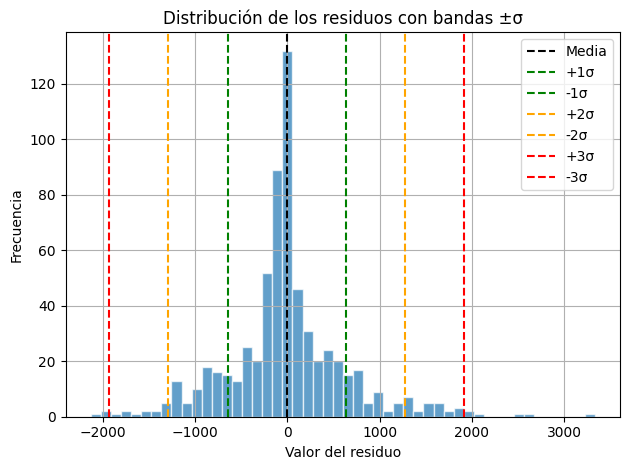

In [11]:
import matplotlib.pyplot as plt

# Visualización
plt.figure()
plt.hist(residuos, bins=50, alpha=0.7,edgecolor='white')
plt.axvline(media, color='black', linestyle='--', label='Media')

# Líneas para ±1σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(media + k * std, color=color, linestyle='--', label=f'+{k}σ')
    plt.axvline(media - k * std, color=color, linestyle='--', label=f'-{k}σ')

plt.title("Distribución de los residuos con bandas ±σ")
plt.xlabel("Valor del residuo")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Gráfico de Residuos de Modelo Propuesto**

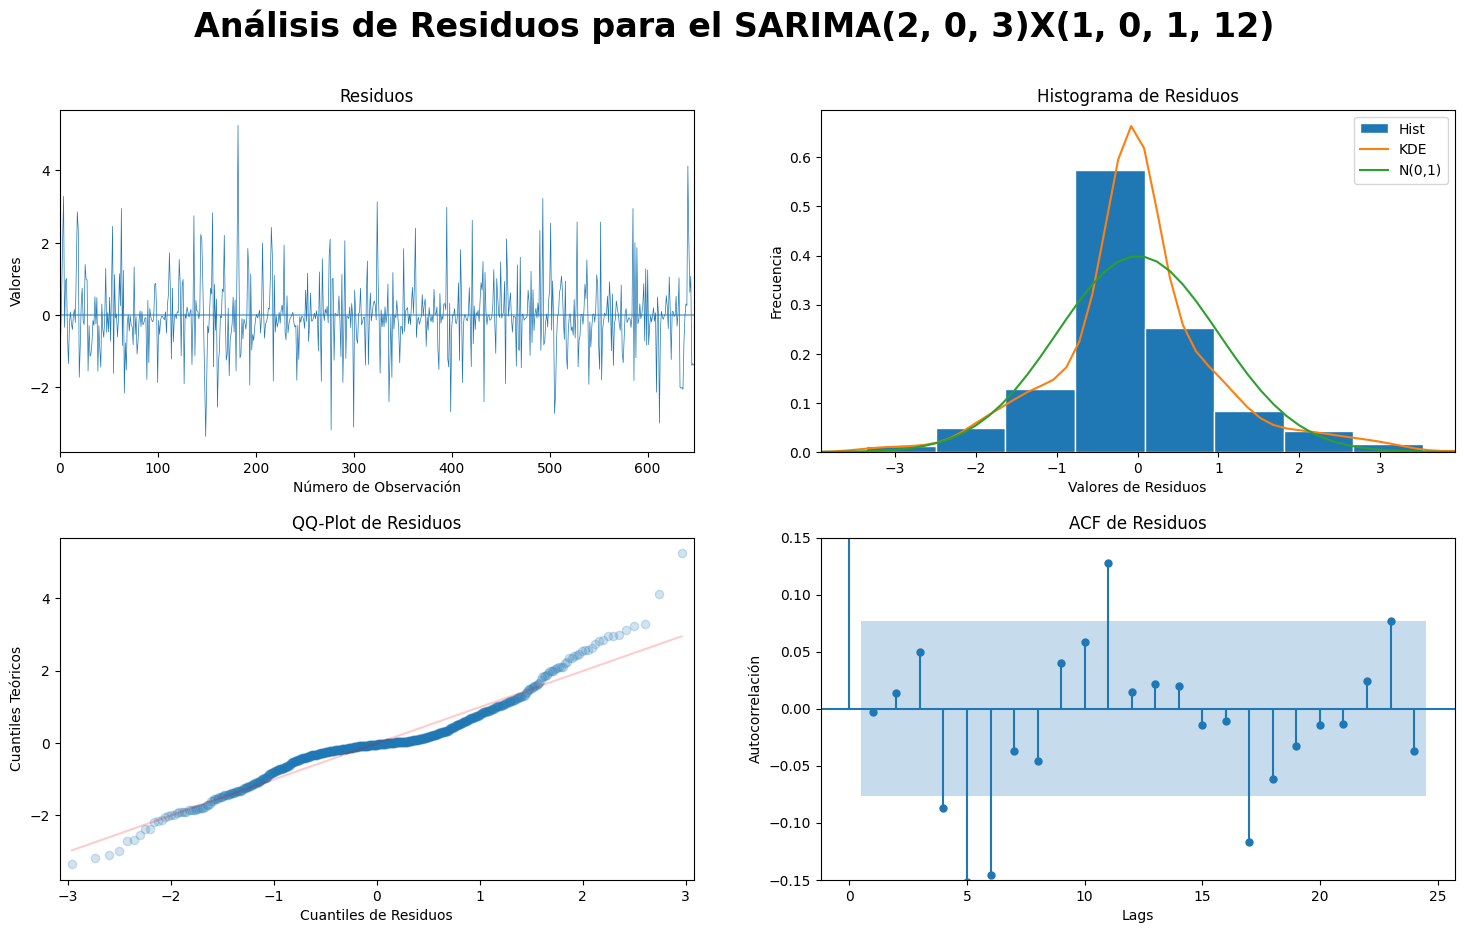

In [12]:
from matplotlib.collections import PathCollection

fig = modelo.plot_diagnostics(figsize=(18, 10), lags=24)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("ACF de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Lags")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el SARIMA(2, 0, 3)X(1, 0, 1, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/05-analisis-de-residuos.svg', bbox_inches='tight')
plt.show()


# **MODELO PROPUESTO**


$$
\text{ARIMA}(1,0,0) \times (0,0,1)_{12} \text{ para $W_t$}
$$

$$
\text{ARIMA}(1,0,0) \times (0,1,1)_{12} \text{ para $X_t$}
$$

con los coeficientes:

- $\phi_1 = 0.1691785261672151$
- $\Theta_1 = 0.6868323986912898$

$$
(1
- \phi_1B)W_t=
(1
- \Theta_1 B^{12})\varpsilon_{t}
$$

Donde $Wt = \nabla_{12}^1 X_t = X_t - X_{t-12}$ y $\varpsilon_t \sim \mathcal{N}(0, 1)$